# 'Part I: Data and Feature-engineering. 

In [7]:
# Part I: Data and Feature-engineering

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer



In [8]:
df = pd.read_csv('dataset.csv')

Tokenization

In [10]:
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)


In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nandh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
df['tokenized_text'] = df['comment_text'].apply(word_tokenize)

In [13]:
df['comment_text'] = df['tokenized_text'].apply(lambda x: ' '.join(x))

In [14]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokenized_text
0,Explanation Why the edits made under my userna...,0,0,0,0,0,0,"[Explanation, Why, the, edits, made, under, my..."
1,D'aww ! He matches this background colour I 'm...,0,0,0,0,0,0,"[D'aww, !, He, matches, this, background, colo..."
2,"Hey man , I 'm really not trying to edit war ....",0,0,0,0,0,0,"[Hey, man, ,, I, 'm, really, not, trying, to, ..."
3,`` More I ca n't make any real suggestions on ...,0,0,0,0,0,0,"[``, More, I, ca, n't, make, any, real, sugges..."
4,"You , sir , are my hero . Any chance you remem...",0,0,0,0,0,0,"[You, ,, sir, ,, are, my, hero, ., Any, chance..."


In [15]:
# Join the tokenized words back into complete sentences
df['processed_text'] = df['tokenized_text'].apply(lambda tokens: ' '.join(tokens))



In [16]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokenized_text,processed_text
0,Explanation Why the edits made under my userna...,0,0,0,0,0,0,"[Explanation, Why, the, edits, made, under, my...",Explanation Why the edits made under my userna...
1,D'aww ! He matches this background colour I 'm...,0,0,0,0,0,0,"[D'aww, !, He, matches, this, background, colo...",D'aww ! He matches this background colour I 'm...
2,"Hey man , I 'm really not trying to edit war ....",0,0,0,0,0,0,"[Hey, man, ,, I, 'm, really, not, trying, to, ...","Hey man , I 'm really not trying to edit war ...."
3,`` More I ca n't make any real suggestions on ...,0,0,0,0,0,0,"[``, More, I, ca, n't, make, any, real, sugges...",`` More I ca n't make any real suggestions on ...
4,"You , sir , are my hero . Any chance you remem...",0,0,0,0,0,0,"[You, ,, sir, ,, are, my, hero, ., Any, chance...","You , sir , are my hero . Any chance you remem..."


import spacy
from tqdm import tqdm  # tqdm is used for progress visualization

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Function to tokenize a batch and remove punctuation
def spacy_tokenize_batch(batch_texts):
    docs = nlp.pipe(batch_texts, batch_size=10000)  # Use batching to speed up processing
    return [' '.join([token.text for token in doc if not token.is_punct]) for doc in docs]

# Apply tokenization on the entire dataset using batch processing
# tqdm is used here for a progress bar since the dataset is large
tqdm.pandas()  # Enables the use of tqdm with pandas
df['processed_text_no_punct'] = df['tokenized_text'].progress_apply(spacy_tokenize_batch)

# Check a sample of the output
print(df.head())


In [18]:
output_file = "processed_dataset_no_punct.csv"
df[['comment_text', 'processed_text_no_punct']].to_csv(output_file, index=False)

print(f"Processed text without punctuation saved to {output_file}")

KeyError: "['processed_text_no_punct'] not in index"

In [38]:
dfp = pd.read_csv('processed_dataset_no_punct.csv')

In [40]:
dfp.head()

,comment_text,processed_text_no_punct
0,Explanation Why the edits made under my userna...,"['Explanation', 'Why', 'the', 'edits', 'made',..."
1,D'aww ! He matches this background colour I 'm...,"[""D'aww"", '', 'He', 'matches', 'this', 'backgr..."
2,"Hey man , I 'm really not trying to edit war ....","['Hey', 'man', '', 'I', 'm', 'really', 'not', ..."
3,`` More I ca n't make any real suggestions on ...,"['` `', 'More', 'I', 'ca', ""n't"", 'make', 'any..."
4,"You , sir , are my hero . Any chance you remem...","['You', '', 'sir', '', 'are', 'my', 'hero', ''..."


In [47]:
for i in range(1):
    print(df['comment_text'][i])
    print('/n')
    print(dfp['processed_text_no_punct'][i])
    print('/n')
    print(df['tokenized_text'][i])


Explanation Why the edits made under my username Hardcore Metallica Fan were reverted ? They were n't vandalisms , just closure on some GAs after I voted at New York Dolls FAC . And please do n't remove the template from the talk page since I 'm retired now.89.205.38.27
/n
['Explanation', 'Why', 'the', 'edits', 'made', 'under', 'my', 'username', 'Hardcore', 'Metallica', 'Fan', 'were', 'reverted', '', 'They', 'were', "n't", 'vandalisms', '', 'just', 'closure', 'on', 'some', 'GAs', 'after', 'I', 'voted', 'at', 'New', 'York', 'Dolls', 'FAC', '', 'And', 'please', 'do', "n't", 'remove', 'the', 'template', 'from', 'the', 'talk', 'page', 'since', 'I', 'm', 'retired', 'now.89.205.38.27']
/n
['Explanation', 'Why', 'the', 'edits', 'made', 'under', 'my', 'username', 'Hardcore', 'Metallica', 'Fan', 'were', 'reverted', '?', 'They', 'were', "n't", 'vandalisms', ',', 'just', 'closure', 'on', 'some', 'GAs', 'after', 'I', 'voted', 'at', 'New', 'York', 'Dolls', 'FAC', '.', 'And', 'please', 'do', "n't", 

In [50]:
from sklearn.model_selection import train_test_split

# Define feature (X) and labels (y)
# X is the processed text from 'processed_text' column
X = dfp['processed_text_no_punct']

# y is all the label columns excluding 'comment_text' and tokenized columns
y = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the training and testing sets
print("Training set size (features):", X_train.shape)
print("Testing set size (features):", X_test.shape)
print("Training set size (labels):", y_train.shape)
print("Testing set size (labels):", y_test.shape)


Training set size (features): (127656,)
Testing set size (features): (31915,)
Training set size (labels): (127656, 6)
Testing set size (labels): (31915, 6)


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency

# Fit and transform the training set, and transform the test set using TF-IDF
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Print the shape of the transformed features
print("TF-IDF Training set shape:", X_train_tfidf.shape)
print("TF-IDF Testing set shape:", X_test_tfidf.shape)


TF-IDF Training set shape: (127656, 5000)
TF-IDF Testing set shape: (31915, 5000)


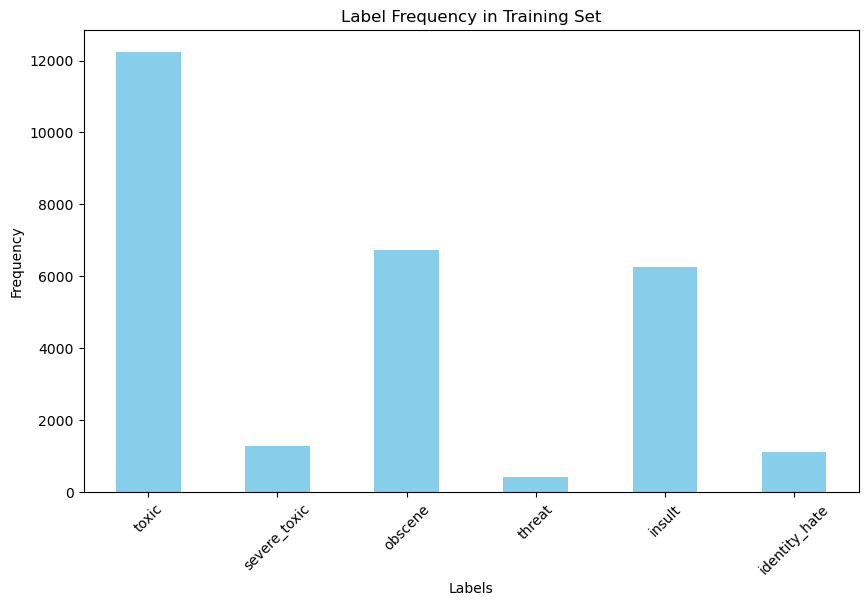

In [54]:
# Calculate the sum of each label in the training set
label_sums = y_train.sum()

# Plot a bar graph to show the frequency of each label
plt.figure(figsize=(10, 6))
label_sums.plot(kind='bar', color='skyblue')
plt.title('Label Frequency in Training Set')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

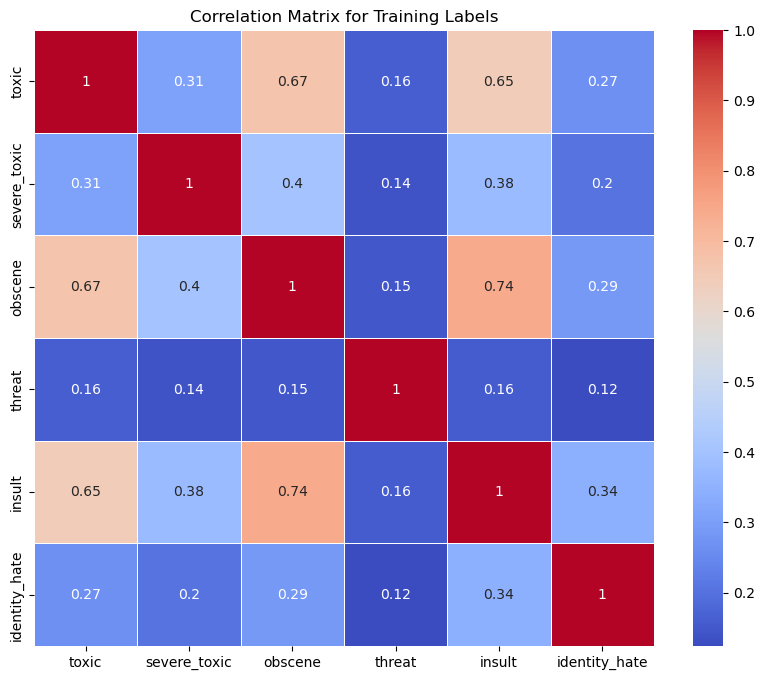

In [55]:
import seaborn as sns

# Calculate the correlation matrix for the label columns in the training set
corr_matrix = y_train.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Training Labels')
plt.show()


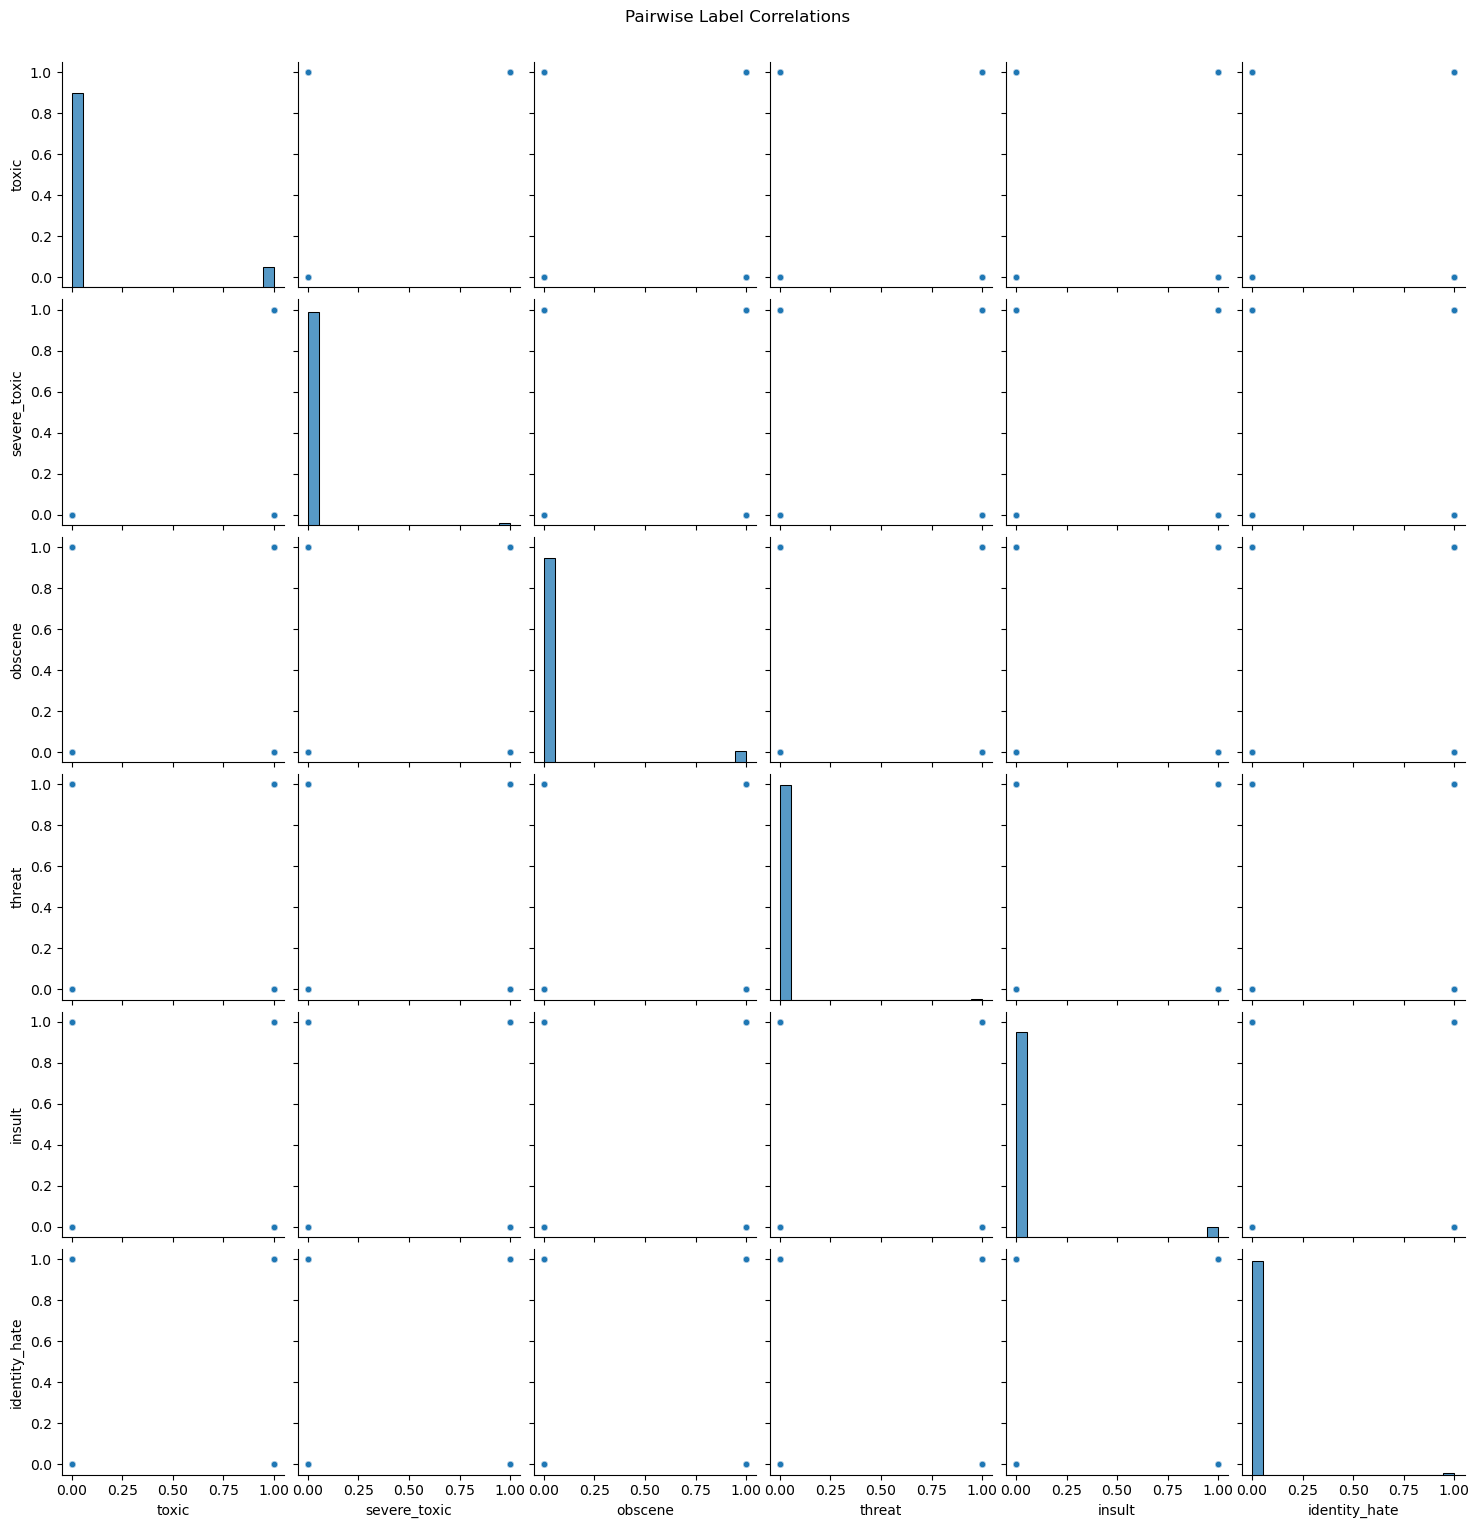

In [56]:
# Plot pairwise correlations between labels using pairplot
sns.pairplot(y_train, kind='scatter', plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle('Pairwise Label Correlations', y=1.02)
plt.show()


# Part-2 

In [58]:
X_train_tfidf.shape


(127656, 5000)

In [59]:
X_test_tfidf.shape

(31915, 5000)

In [60]:
print("Training set size (labels):", y_train.shape)
print("Testing set size (labels):", y_test.shape)

Training set size (labels): (127656, 6)
Testing set size (labels): (31915, 6)


In [61]:
y_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate
140030,1,0,0,0,0,0
159124,0,0,0,0,0,0
60006,0,0,0,0,0,0
65432,0,0,0,0,0,0
154979,0,0,0,0,0,0
...,...,...,...,...,...,...
119879,0,0,0,0,0,0
103694,0,0,0,0,0,0
131932,1,0,0,0,0,0
146867,0,0,0,0,0,0


In [62]:
y_train = y_train['toxic']  # Label is the 'toxic' column
y_test = y_test['toxic']

In [63]:
y_train

140030    1
159124    0
60006     0
65432     0
154979    0
         ..
119879    0
103694    0
131932    1
146867    0
121958    0
Name: toxic, Length: 127656, dtype: int64

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [65]:
nb_model = MultinomialNB()

In [66]:
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [67]:
nb_pred = nb_model.predict(X_test_tfidf)

In [68]:
print("Multinomial Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, nb_pred):.2f}")
print(classification_report(y_test, nb_pred))

Multinomial Naive Bayes:
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28859
           1       0.93      0.49      0.64      3056

    accuracy                           0.95     31915
   macro avg       0.94      0.74      0.80     31915
weighted avg       0.95      0.95      0.94     31915



In [69]:

lr_model = LogisticRegression(max_iter=1000)

In [70]:
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [71]:
lr_pred = lr_model.predict(X_test_tfidf)

In [72]:
print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.2f}")
print(classification_report(y_test, lr_pred))



Logistic Regression:
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.90      0.63      0.74      3056

    accuracy                           0.96     31915
   macro avg       0.93      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915



In [73]:
# Initialize LinearSVC
linear_svc_model = LinearSVC()

# Fit LinearSVC on training data
linear_svc_model.fit(X_train_tfidf, y_train)

# Make predictions
svc_pred = linear_svc_model.predict(X_test_tfidf)

# Evaluate the model
print("\nLinear SVC:")
print(f"Accuracy: {accuracy_score(y_test, svc_pred):.2f}")
print(classification_report(y_test, svc_pred))

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Linear SVC:
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28859
           1       0.88      0.68      0.77      3056

    accuracy                           0.96     31915
   macro avg       0.92      0.83      0.87     31915
weighted avg       0.96      0.96      0.96     31915



<Figure size 600x600 with 0 Axes>

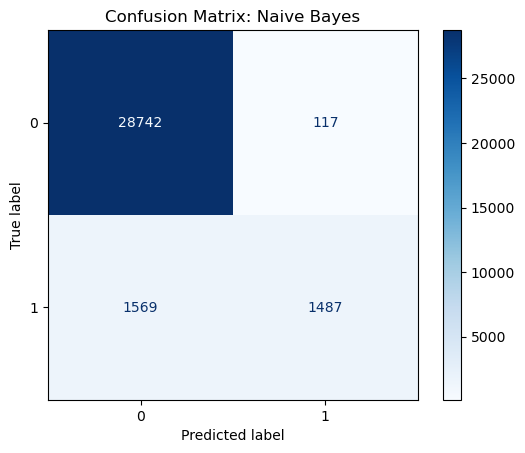

<Figure size 600x600 with 0 Axes>

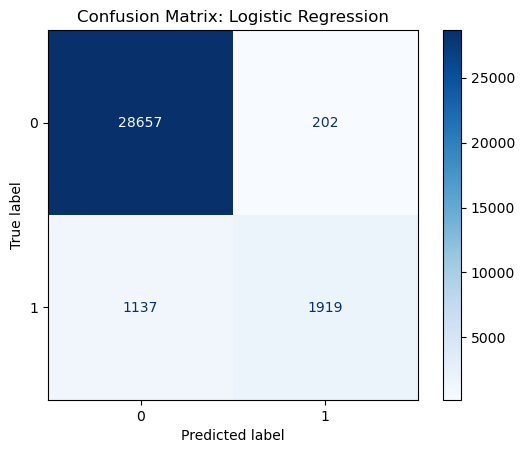

<Figure size 600x600 with 0 Axes>

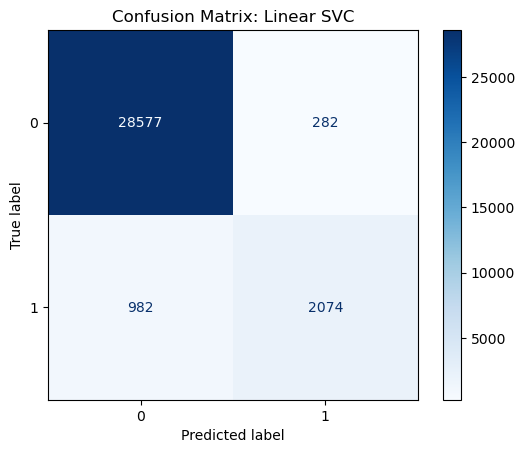

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay


models = {
    "Naive Bayes": nb_model,
    "Logistic Regression": lr_model,
    "Linear SVC": linear_svc_model
}

# Iterate through each model to plot the confusion matrix
for model_name, model in models.items():
    # Generate predictions for the test set
    y_pred = model.predict(X_test_tfidf)
    
    # Create and plot the confusion matrix
    plt.figure(figsize=(6, 6))
    cm_display = ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test, cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

In [75]:
from sklearn.ensemble import VotingClassifier

# Initialize the Voting Classifier with all three models
voting_clf = VotingClassifier(estimators=[
    ('nb', nb_model), 
    ('log_reg', lr_model), 
    ('svc', linear_svc_model)],
    voting='hard')

# Train the Voting Classifier
voting_clf.fit(X_train_tfidf, y_train)

# Predict and evaluate
voting_pred = voting_clf.predict(X_test_tfidf)
print("\nVoting Classifier:")
print(f"Accuracy: {accuracy_score(y_test, voting_pred):.2f}")
print(classification_report(y_test, voting_pred))


C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Voting Classifier:
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.91      0.63      0.75      3056

    accuracy                           0.96     31915
   macro avg       0.94      0.81      0.86     31915
weighted avg       0.96      0.96      0.96     31915



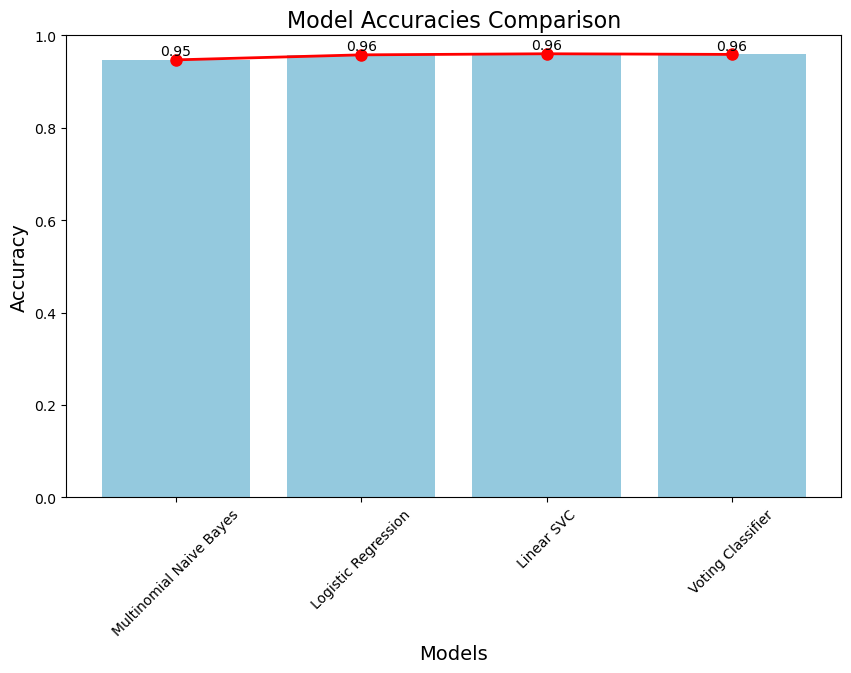

In [76]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Collect accuracies
model_accuracies = {
    'Multinomial Naive Bayes': accuracy_score(y_test, nb_pred),
    'Logistic Regression': accuracy_score(y_test, lr_pred),
    'Linear SVC': accuracy_score(y_test, svc_pred),
    'Voting Classifier': accuracy_score(y_test, voting_pred)
}

# Extract keys and values for plotting
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Plot the accuracies
plt.figure(figsize=(10, 6))

# Bar plot of model accuracies
sns.barplot(x=model_names, y=accuracies, color='skyblue')

# Adding a line plot to highlight the differences
plt.plot(model_names, accuracies, color='red', marker='o', linestyle='-', linewidth=2, markersize=8)

# Adding data labels on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center', fontsize=10, color='black')

# Adding titles and labels
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracies Comparison', fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Setting the y-axis limit for better visualization

plt.show()


# Part-3 

In [78]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [79]:
# Extract the features and label
feature = df['comment_text']
label = df['toxic']


In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Define tokenizer and fit on the feature set
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(feature)

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(feature)


In [81]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 10
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define LSTM model with random embeddings
basic_model = Sequential()
basic_model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length))
basic_model.add(LSTM(64, return_sequences=False))
basic_model.add(Dense(1, activation='sigmoid'))

# Compile and fit the model
basic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
basic_model.fit(padded_sequences, label, epochs=4, batch_size=32, verbose=2)

# Save the model
basic_model.save('lstm_basic_model.h5')


C:\Users\nandh\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/4
4987/4987 - 43s - 9ms/step - accuracy: 0.9442 - loss: 0.1767
Epoch 2/4
4987/4987 - 38s - 8ms/step - accuracy: 0.9504 - loss: 0.1488
Epoch 3/4
4987/4987 - 35s - 7ms/step - accuracy: 0.9534 - loss: 0.1342
Epoch 4/4
4987/4987 - 38s - 8ms/step - accuracy: 0.9571 - loss: 0.1207


In [83]:
embedding_dim = 100  # Change this to match the GloVe embedding dimensions

glove_file_path = 'glove.6B.100d.txt'  # Make sure the file path matches the embedding dimensions
embeddings_index = {}

# Load GloVe Embeddings
with open(glove_file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create Embedding Matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None and len(embedding_vector) == embedding_dim:
            embedding_matrix[i] = embedding_vector  # Only assign if the dimensions match


In [84]:
# Define LSTM model with GloVe embeddings
glove_model = Sequential()
glove_model.add(Embedding(input_dim=vocab_size,
                          output_dim=embedding_dim,
                          weights=[embedding_matrix],
                          trainable=False))  # Use pre-trained GloVe embeddings without further training
glove_model.add(LSTM(64, return_sequences=False))
glove_model.add(Dense(1, activation='sigmoid'))

# Compile the model
glove_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the entire dataset
glove_model.fit(padded_sequences, label, epochs=4, batch_size=32, verbose=2)

# Save the model
glove_model.save('lstm_glove_model.h5')

Epoch 1/4
4987/4987 - 34s - 7ms/step - accuracy: 0.9399 - loss: 0.1844
Epoch 2/4
4987/4987 - 28s - 6ms/step - accuracy: 0.9470 - loss: 0.1640
Epoch 3/4
4987/4987 - 30s - 6ms/step - accuracy: 0.9494 - loss: 0.1564
Epoch 4/4
4987/4987 - 32s - 6ms/step - accuracy: 0.9515 - loss: 0.1500


In [85]:
custom_comments = [
    "This is amazing work!",
    "You are stupid and annoying.",
    "I can't believe how bad this is.",
    "Great job! Keep it up.",
    "This is absolutely ridiculous."
]

# Tokenize and pad the custom comments
custom_sequences = tokenizer.texts_to_sequences(custom_comments)
custom_padded = pad_sequences(custom_sequences, maxlen=max_length, padding='post')

# Predict toxicity using the basic model
print("\nBasic Tokenizer (Random Embeddings) Predictions:")
basic_predictions = basic_model.predict(custom_padded)
for i, comment in enumerate(custom_comments):
    print(f"Comment: '{comment}' - Toxicity Probability: {basic_predictions[i][0]:.2f}")

# Predict toxicity using the GloVe model
print("\nGloVe Embeddings Predictions:")
glove_predictions = lstm_model.predict(custom_padded)
for i, comment in enumerate(custom_comments):
    print(f"Comment: '{comment}' - Toxicity Probability: {glove_predictions[i][0]:.2f}")


Basic Tokenizer (Random Embeddings) Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Comment: 'This is amazing work!' - Toxicity Probability: 0.01
Comment: 'You are stupid and annoying.' - Toxicity Probability: 0.99
Comment: 'I can't believe how bad this is.' - Toxicity Probability: 0.03
Comment: 'Great job! Keep it up.' - Toxicity Probability: 0.00
Comment: 'This is absolutely ridiculous.' - Toxicity Probability: 0.14

GloVe Embeddings Predictions:


NameError: name 'lstm_model' is not defined

In [ ]:
# Evaluate the basic embedding model
basic_accuracy = basic_model.evaluate(padded_sequences, label, batch_size=32, verbose=0)
print(f"Accuracy for the Basic Embedding Model: {basic_accuracy[1]:.2f}")

# Evaluate the GloVe embedding model
glove_accuracy = glove_model.evaluate(padded_sequences, label, batch_size=32, verbose=0)
print(f"Accuracy for the GloVe Embedding Model: {glove_accuracy[1]:.2f}")
